In [1]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



2025-03-05 03:05:04.256092: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-05 03:05:04.286740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741140304.335343  719611 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741140304.350048  719611 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 03:05:04.401000: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
d_p = 40
d_V = 40
epochs = 300    


In [17]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(80,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(3,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
])



In [18]:
folder_path = "data/test_data/example_data/heat2d/"

In [19]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","epochs":epochs})

INFO:sciml.model.deeponet.deeponet:Model initialized with 100 epochs, 32 batch size, 0.001 learning rate


In [20]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 10023.43it/s]


In [21]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 80)
(40, 8000, 3)
(40, 8000)


In [8]:
train_history = model.fit()

Training progress:   0%|          | 0/100 [00:00<?, ?it/s]2025-03-05 03:05:09.624125: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.deeponet.deeponet:Epoch 0 completed
Training progress:   1%|          | 1/100 [00:00<01:19,  1.25it/s]2025-03-05 03:05:09.932709: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.deeponet.deeponet:Epoch 1 completed
Training progress:   3%|▎         | 3/100 [00:01<00:41,  2.31it/s]2025-03-05 03:05:10.605047: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.deeponet.deeponet:Epoch 3 completed
Training progress:   7%|▋         | 7/100 [00:02<00:31,  2.92it/s]2025-03-05 03:05:11.843713: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT

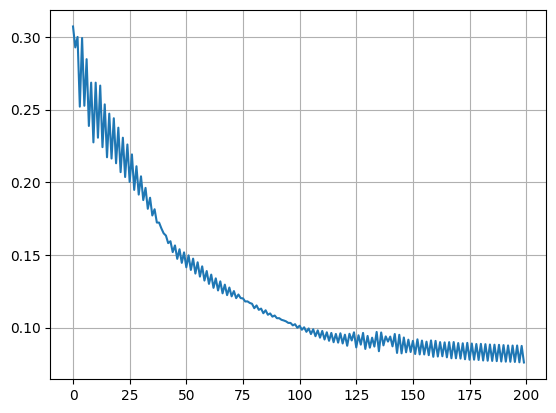

In [10]:
plt.plot(train_history)
plt.grid()
plt.show()